# Additional examples

Following our analysis of the curious case of HD 131339 "b" in the tutorial, below are additional examples of published data that could be analyzed with `backtracks`. If you use the package in your work (or want to and need help), please reach out to us, and we can include your case here!

In [1]:
# start by importing the System object from backtracks:
from backtracks import System

## Baade's Window (HD 165054), Nguyen et al. (2020)

Turns out that sometimes, interloping background sources are useful (if you know about them already)! In this case, the bright foreground star HD 165054 lies between our line of sight and Baade's Window, a clearing in the dust-lanes of our own galaxy from which we can see into the galactic buldge (where there are lots of stars). A direct imaging instrument with a small field of view can be difficult to calibrate. Most absolute astroemtric calibrations are performed on wide fields of stars (like the LMC or globular clusters), which aren't dense enough to be useful for instruments designed to stare very closely at individual stars. HD 1645054 provides a nice alternative, being a bright star that an instrument like GPI can lock on to, but with plenty of (faint, but not too faint) background stars that follow predictable background helices that can be referenced to observations from precalibrated instruments with wider FOVs. This kind of analysis was presented in [Nguyen et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..244N/abstract).

In [2]:
!wget https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/hd165054_orbitizelike.csv

--2025-02-10 13:36:43--  https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/hd165054_orbitizelike.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/hd165054_orbitizelike.csv [following]
--2025-02-10 13:36:43--  https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/hd165054_orbitizelike.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1134 (1.1K) [text/plain]
Saving to: ‘hd165054_orbitizelike.csv’

hd165054_orbitizeli 100%[===================>]   1.11K  --.-KB/s    in 0s      

2025-02-10 13:36:43 (135 MB/s) - ‘hd1650

### BG 0

In [3]:
# this input file has two candidates, so we specify the obj_num kwarg here:
obj_num = 0
# we'll use this optional argument that accepts a candidate file with epochs in ISO formatted time (YYYY-MM-DD)
yy_epochs=True
# this is a pretty dense field, so we'll shrink the window for the gaia query
nearby_window=0.15

track = System(target_name="HD165054",
               candidate_file="hd165054_orbitizelike.csv",
               obj_num=obj_num,
               nearby_window=nearby_window, 
               yy_epochs=yy_epochs, 
               fileprefix='./')

[BACKTRACKS INFO]: Examining object = 0 in input file.
[BACKTRACKS INFO]: Resolved the target star 'HD165054' in Simbad!
[BACKTRACKS INFO]: Resolved target's Gaia ID from Simbad, Gaia DR3 4062433888304427648
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered Gaia DR3 data for HD165054
   * Gaia source ID = 4062433888304427648
   * Reference epoch = 2016.0
   * RA = 271.3188 deg
   * Dec = -28.6867 deg
   * PM RA = 27.09 mas/yr
   * PM Dec = -87.79 mas/yr
   * Parallax = 19.70 mas
   * RV = 54.46 km/s
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered 22668 Gaia objects from the 0.15 sq. deg. nearby HD165054
[BACKTRACKS INFO]: Finished nearby background gaia statistics
[BACKTRACKS INFO]: Queried distance prior parameters, L=5327.85, alpha=1.94, beta=2.52
[BACKTRACKS INFO]: Estimating candidate position if stationary in RA,Dec @ 2016.0 from observation #0
[BACKTRACKS INFO]: Opened ephemeris file


[BACKTRACKS INFO]: Generating Stationary plot
[BACKTRACKS INFO]: Stationary plot saved to ./


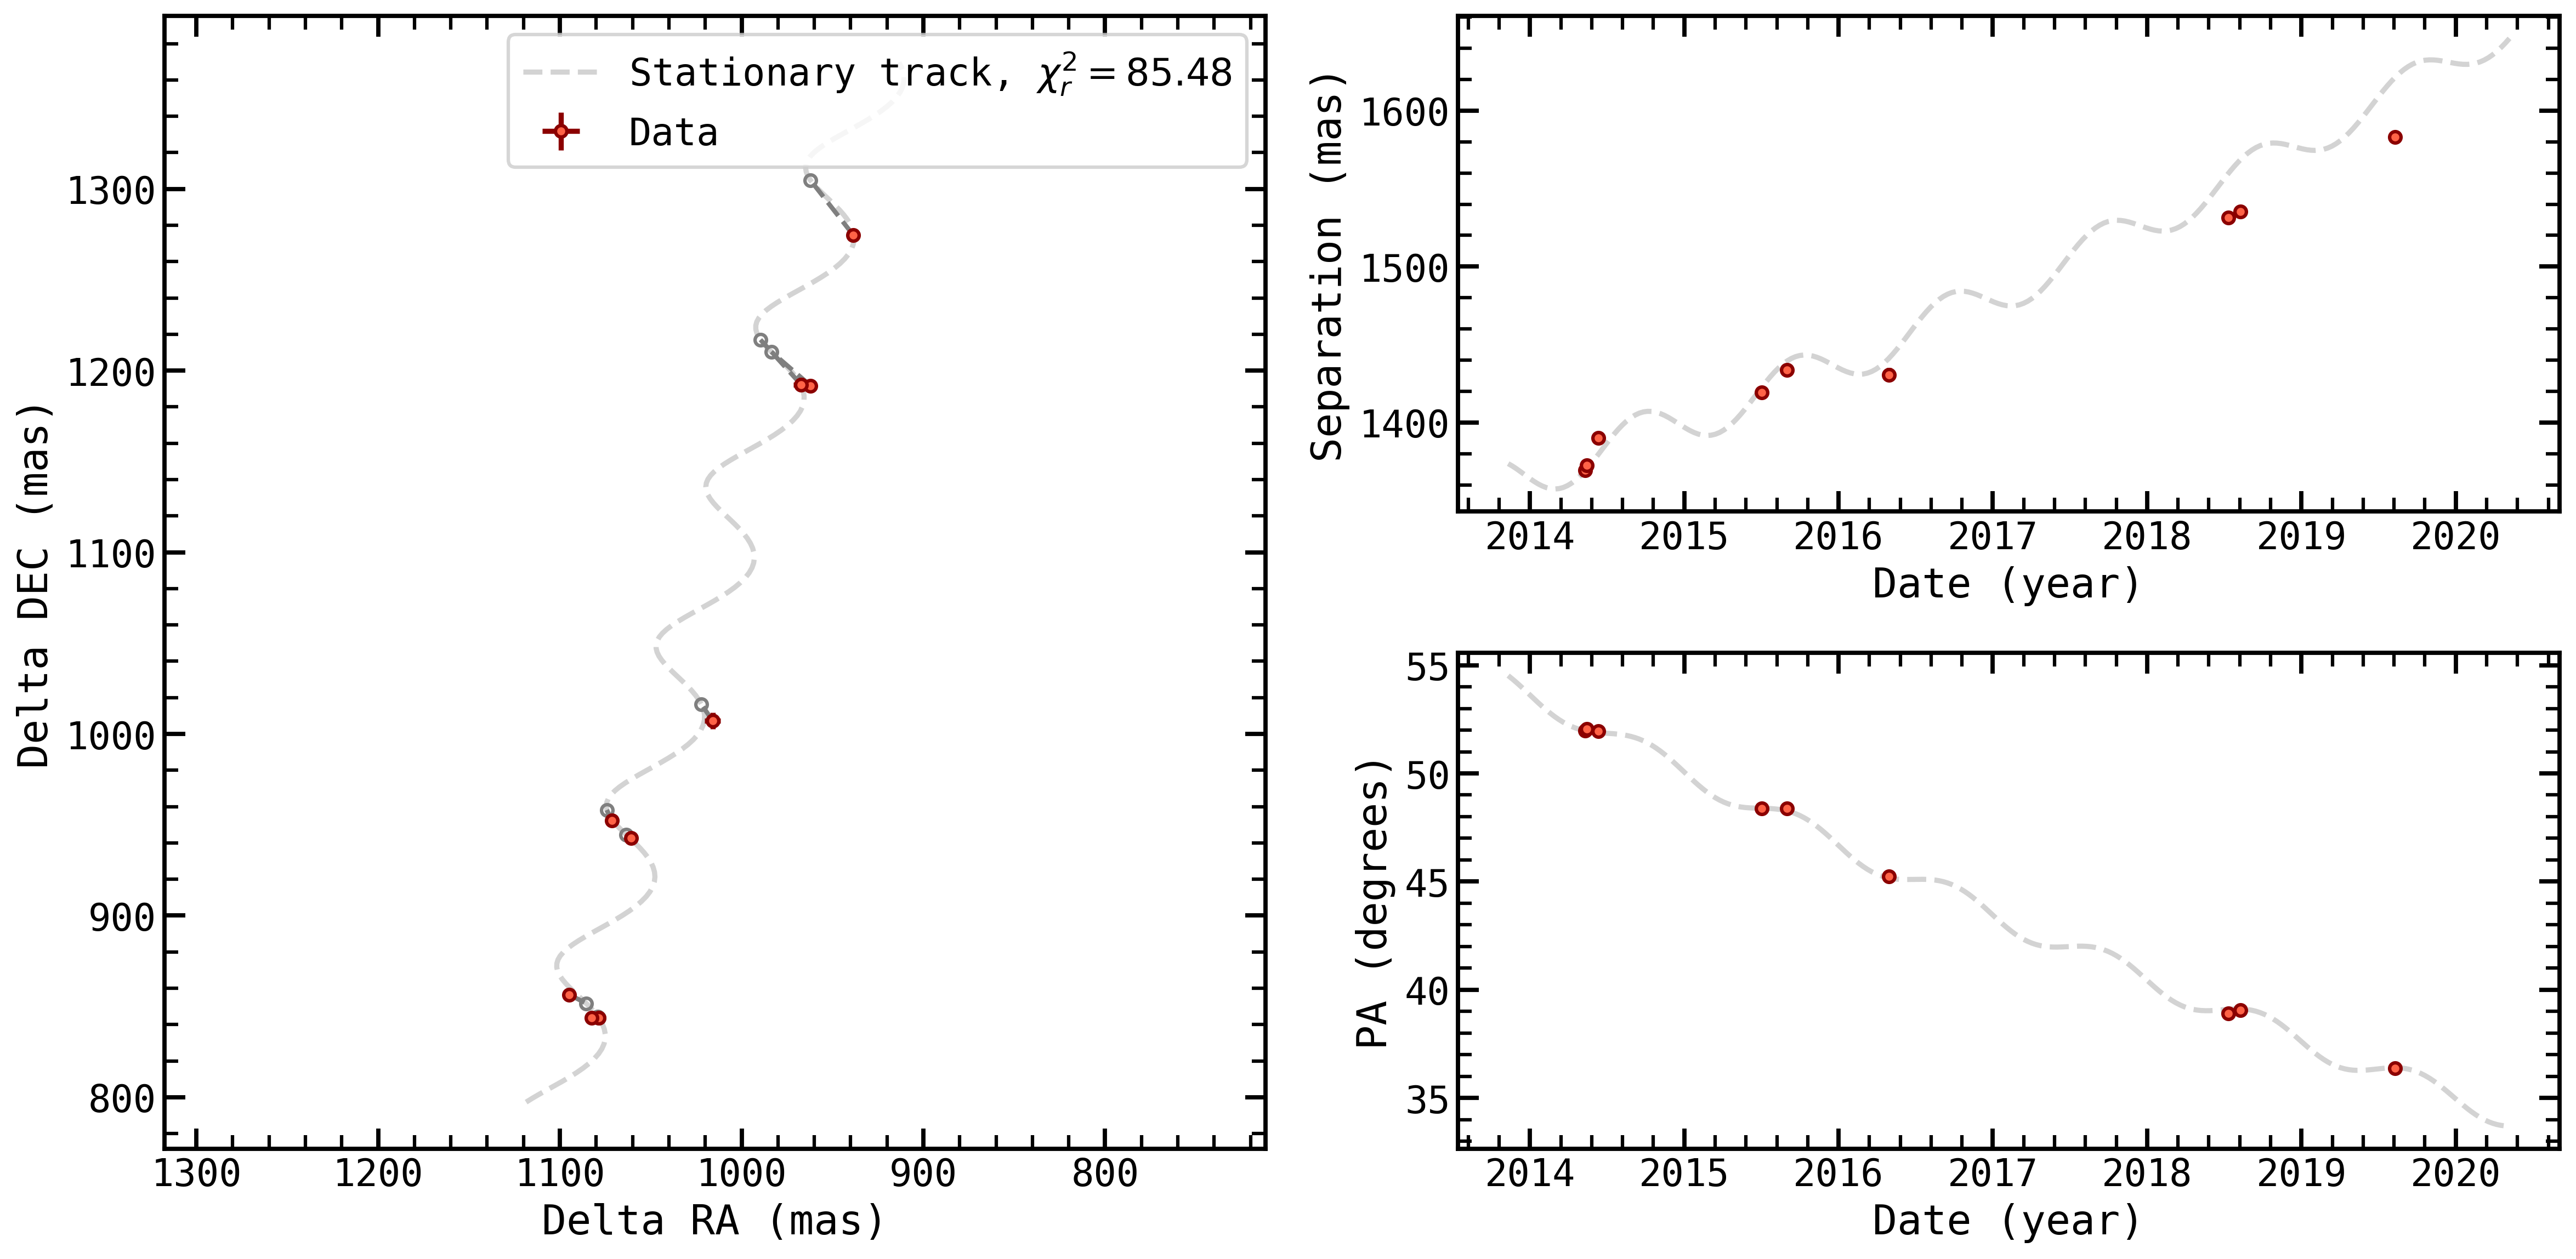

In [4]:
fig_stationary = track.generate_stationary_plot(days_backward=0.5*365.,
                                                days_forward=6*365,
                                                step_size=10.,
                                                filepost='.png')

The stationary track fits the morphology of the data, but we could probably improve the fit by sampling the proper motion and parallax. This will allow us to calibrate (or validate the astrometric solution) of other instruments observing this field in the future.

In [5]:
import multiprocessing as mp
results = track.fit(dlogz=1e-1, npool=mp.cpu_count(), 
                    dynamic=False, nlive=100,
                    mpi_pool=False, 
                    resume=False, 
                    sample_method='rslice')

# save our sampler results
track.save_results(fileprefix='./')

[BACKTRACKS INFO]: Beginning sampling


iter: 2596 | +100 | bound: 53 | nc: 1 | ncall: 183177 | eff(%):  1.473 | loglstar:   -inf < -43.774 <    inf | logz: -67.272 +/-  0.467 | dlogz:  0.001 >  0.100                                      

[BACKTRACKS INFO]: Saving results to ./HD165054_cc0_dynestyrun_results.pkl


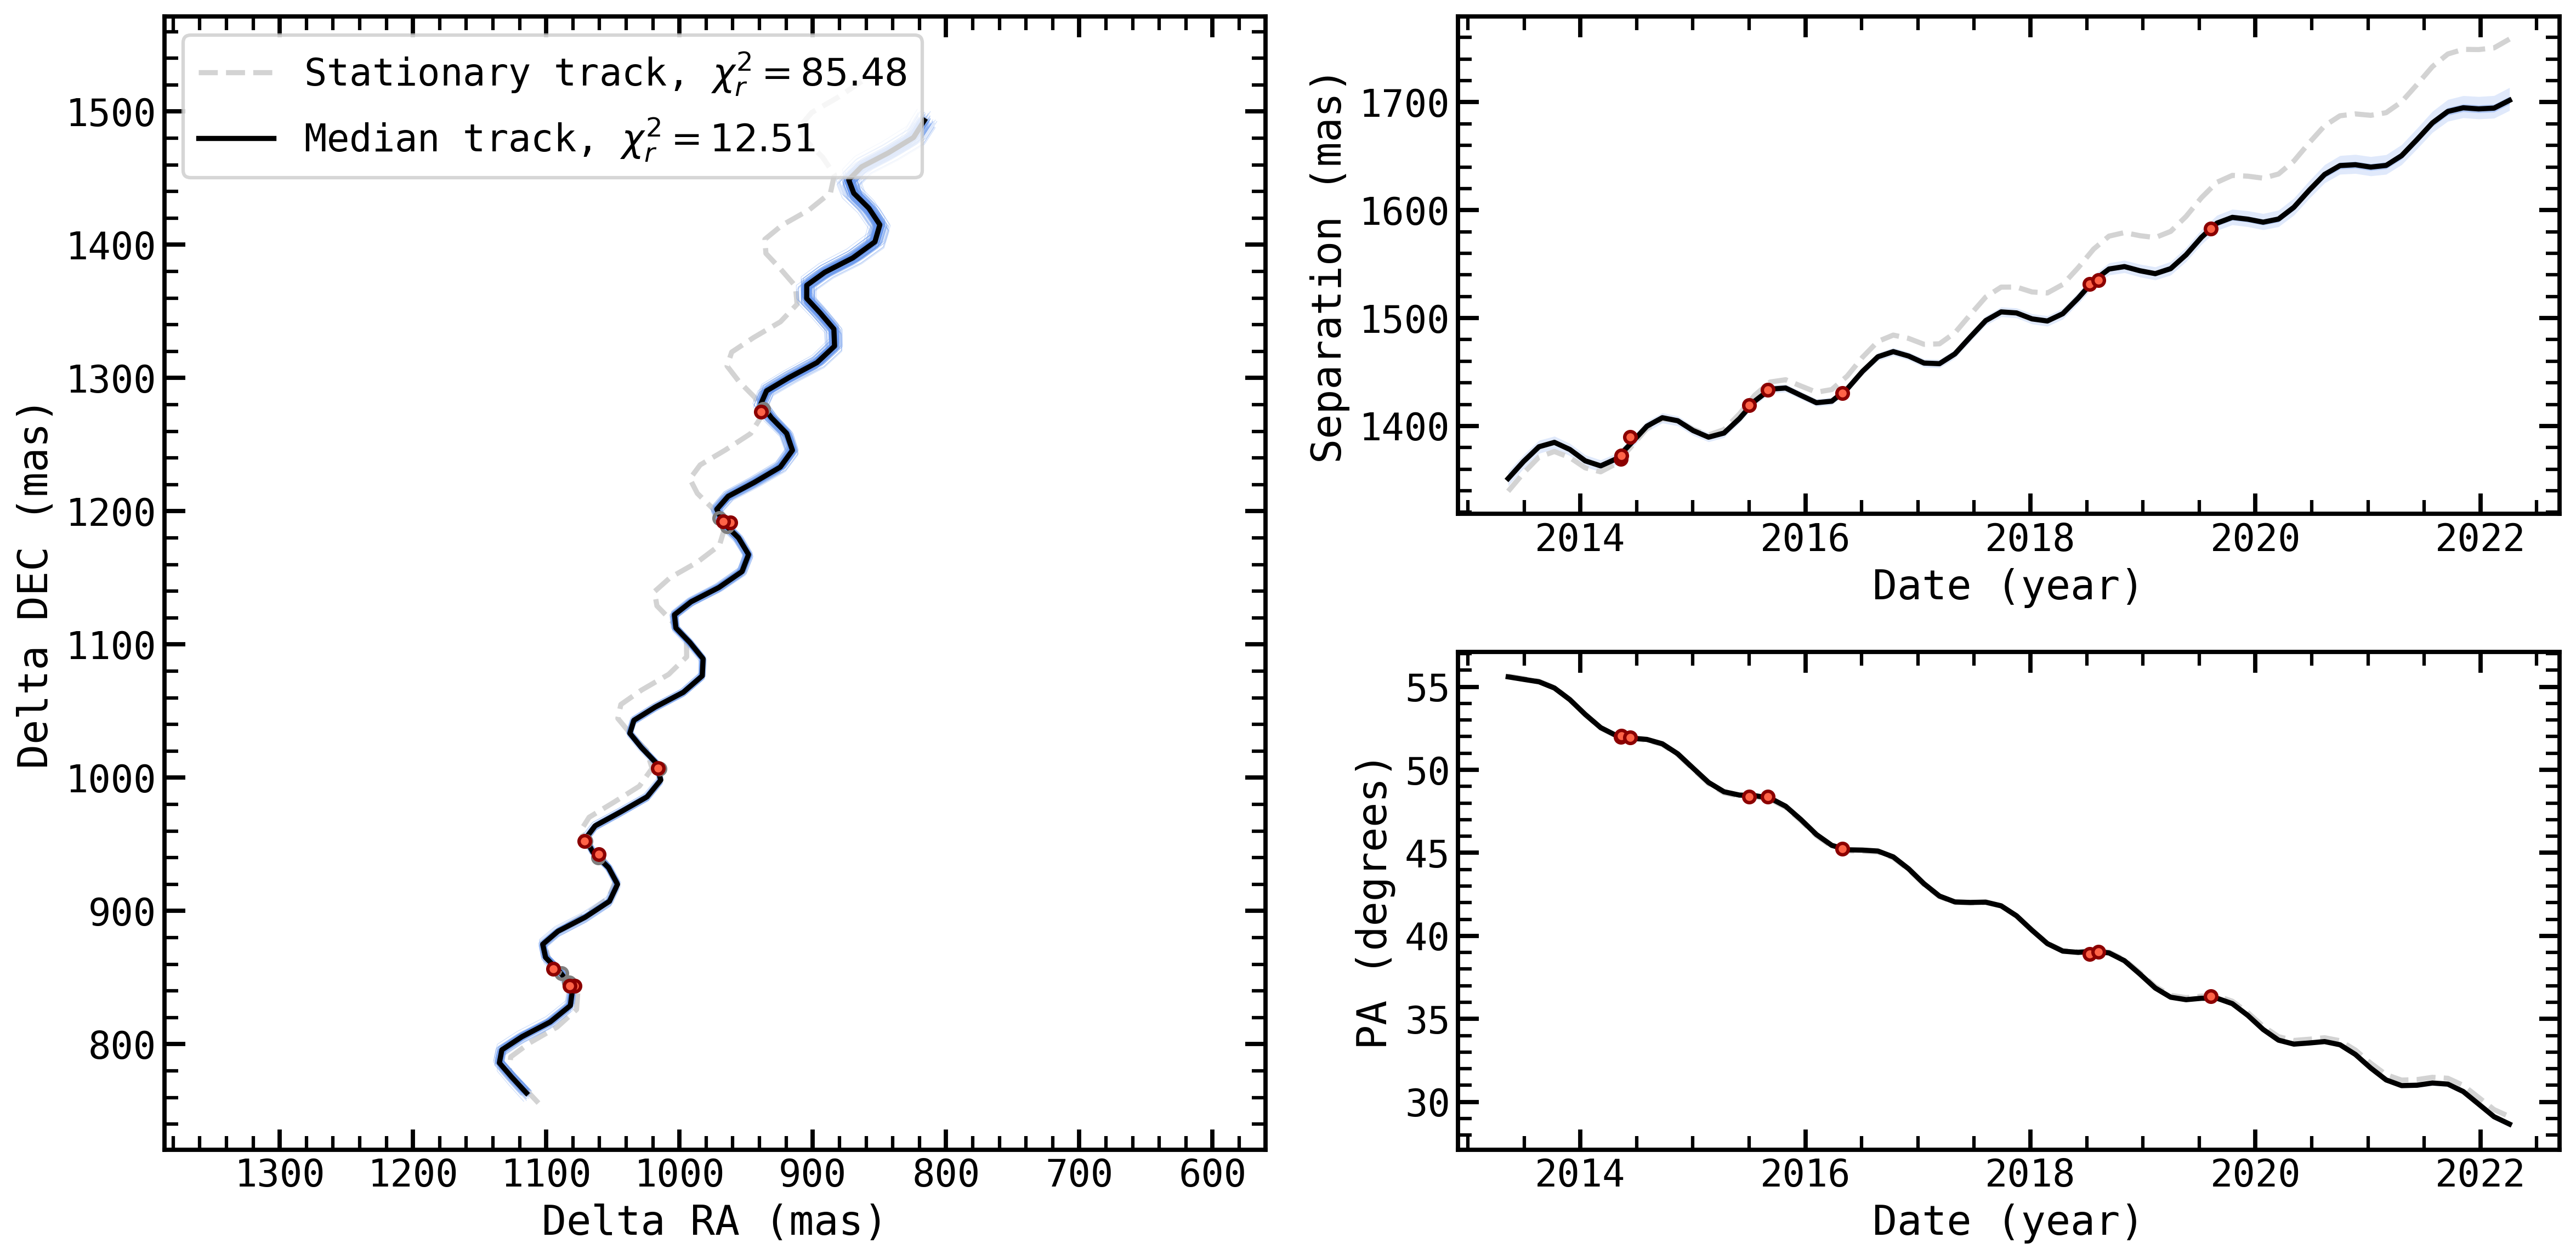

In [6]:
# plot up only the trackplot to show the results
from backtracks.plotting import trackplot
from astropy.time import Time
plot_0 = trackplot(track,
                   ref_epoch = Time(track.ref_epoch, format='jd').jd,
                   days_backward=1.*365.,
                   days_forward=8.*365.,
                   step_size=50., # we can tune this down or up to slow/speed up the rendering
                   plot_radec=False,
                   plot_stationary=True,
                   fileprefix='./',
                   filepost='.png'
                  )

### BG 1

In [7]:
# this input file has two candidates, so we specify the obj_num kwarg here:
obj_num = 1
# we'll use this optional argument that accepts a candidate file with epochs in ISO formatted time (YYYY-MM-DD)
yy_epochs=True
# this is a pretty dense field, so we'll shrink the window for the gaia query
nearby_window=0.15

track = System(target_name="HD165054",
               candidate_file="hd165054_orbitizelike.csv",
               obj_num=obj_num,
               nearby_window=nearby_window, 
               yy_epochs=yy_epochs, 
               fileprefix='./')

[BACKTRACKS INFO]: Examining object = 1 in input file.
[BACKTRACKS INFO]: Resolved the target star 'HD165054' in Simbad!
[BACKTRACKS INFO]: Resolved target's Gaia ID from Simbad, Gaia DR3 4062433888304427648
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered Gaia DR3 data for HD165054
   * Gaia source ID = 4062433888304427648
   * Reference epoch = 2016.0
   * RA = 271.3188 deg
   * Dec = -28.6867 deg
   * PM RA = 27.09 mas/yr
   * PM Dec = -87.79 mas/yr
   * Parallax = 19.70 mas
   * RV = 54.46 km/s
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered 22668 Gaia objects from the 0.15 sq. deg. nearby HD165054
[BACKTRACKS INFO]: Finished nearby background gaia statistics
[BACKTRACKS INFO]: Queried distance prior parameters, L=5327.85, alpha=1.94, beta=2.52
[BACKTRACKS INFO]: Estimating candidate position if stationary in RA,Dec @ 2016.0 from observation #0
[BACKTRACKS INFO]: Opened ephemeris file


In [8]:
import multiprocessing as mp
results = track.fit(dlogz=1e-1, npool=mp.cpu_count(), 
                    dynamic=False, nlive=100,
                    mpi_pool=False, 
                    resume=False, 
                    sample_method='rslice')

# save our sampler results
track.save_results(fileprefix='./')

[BACKTRACKS INFO]: Beginning sampling


iter: 2572 | +100 | bound: 55 | nc: 1 | ncall: 178732 | eff(%):  1.496 | loglstar:   -inf < -49.744 <    inf | logz: -73.006 +/-  0.463 | dlogz:  0.001 >  0.100                                      

[BACKTRACKS INFO]: Saving results to ./HD165054_cc1_dynestyrun_results.pkl


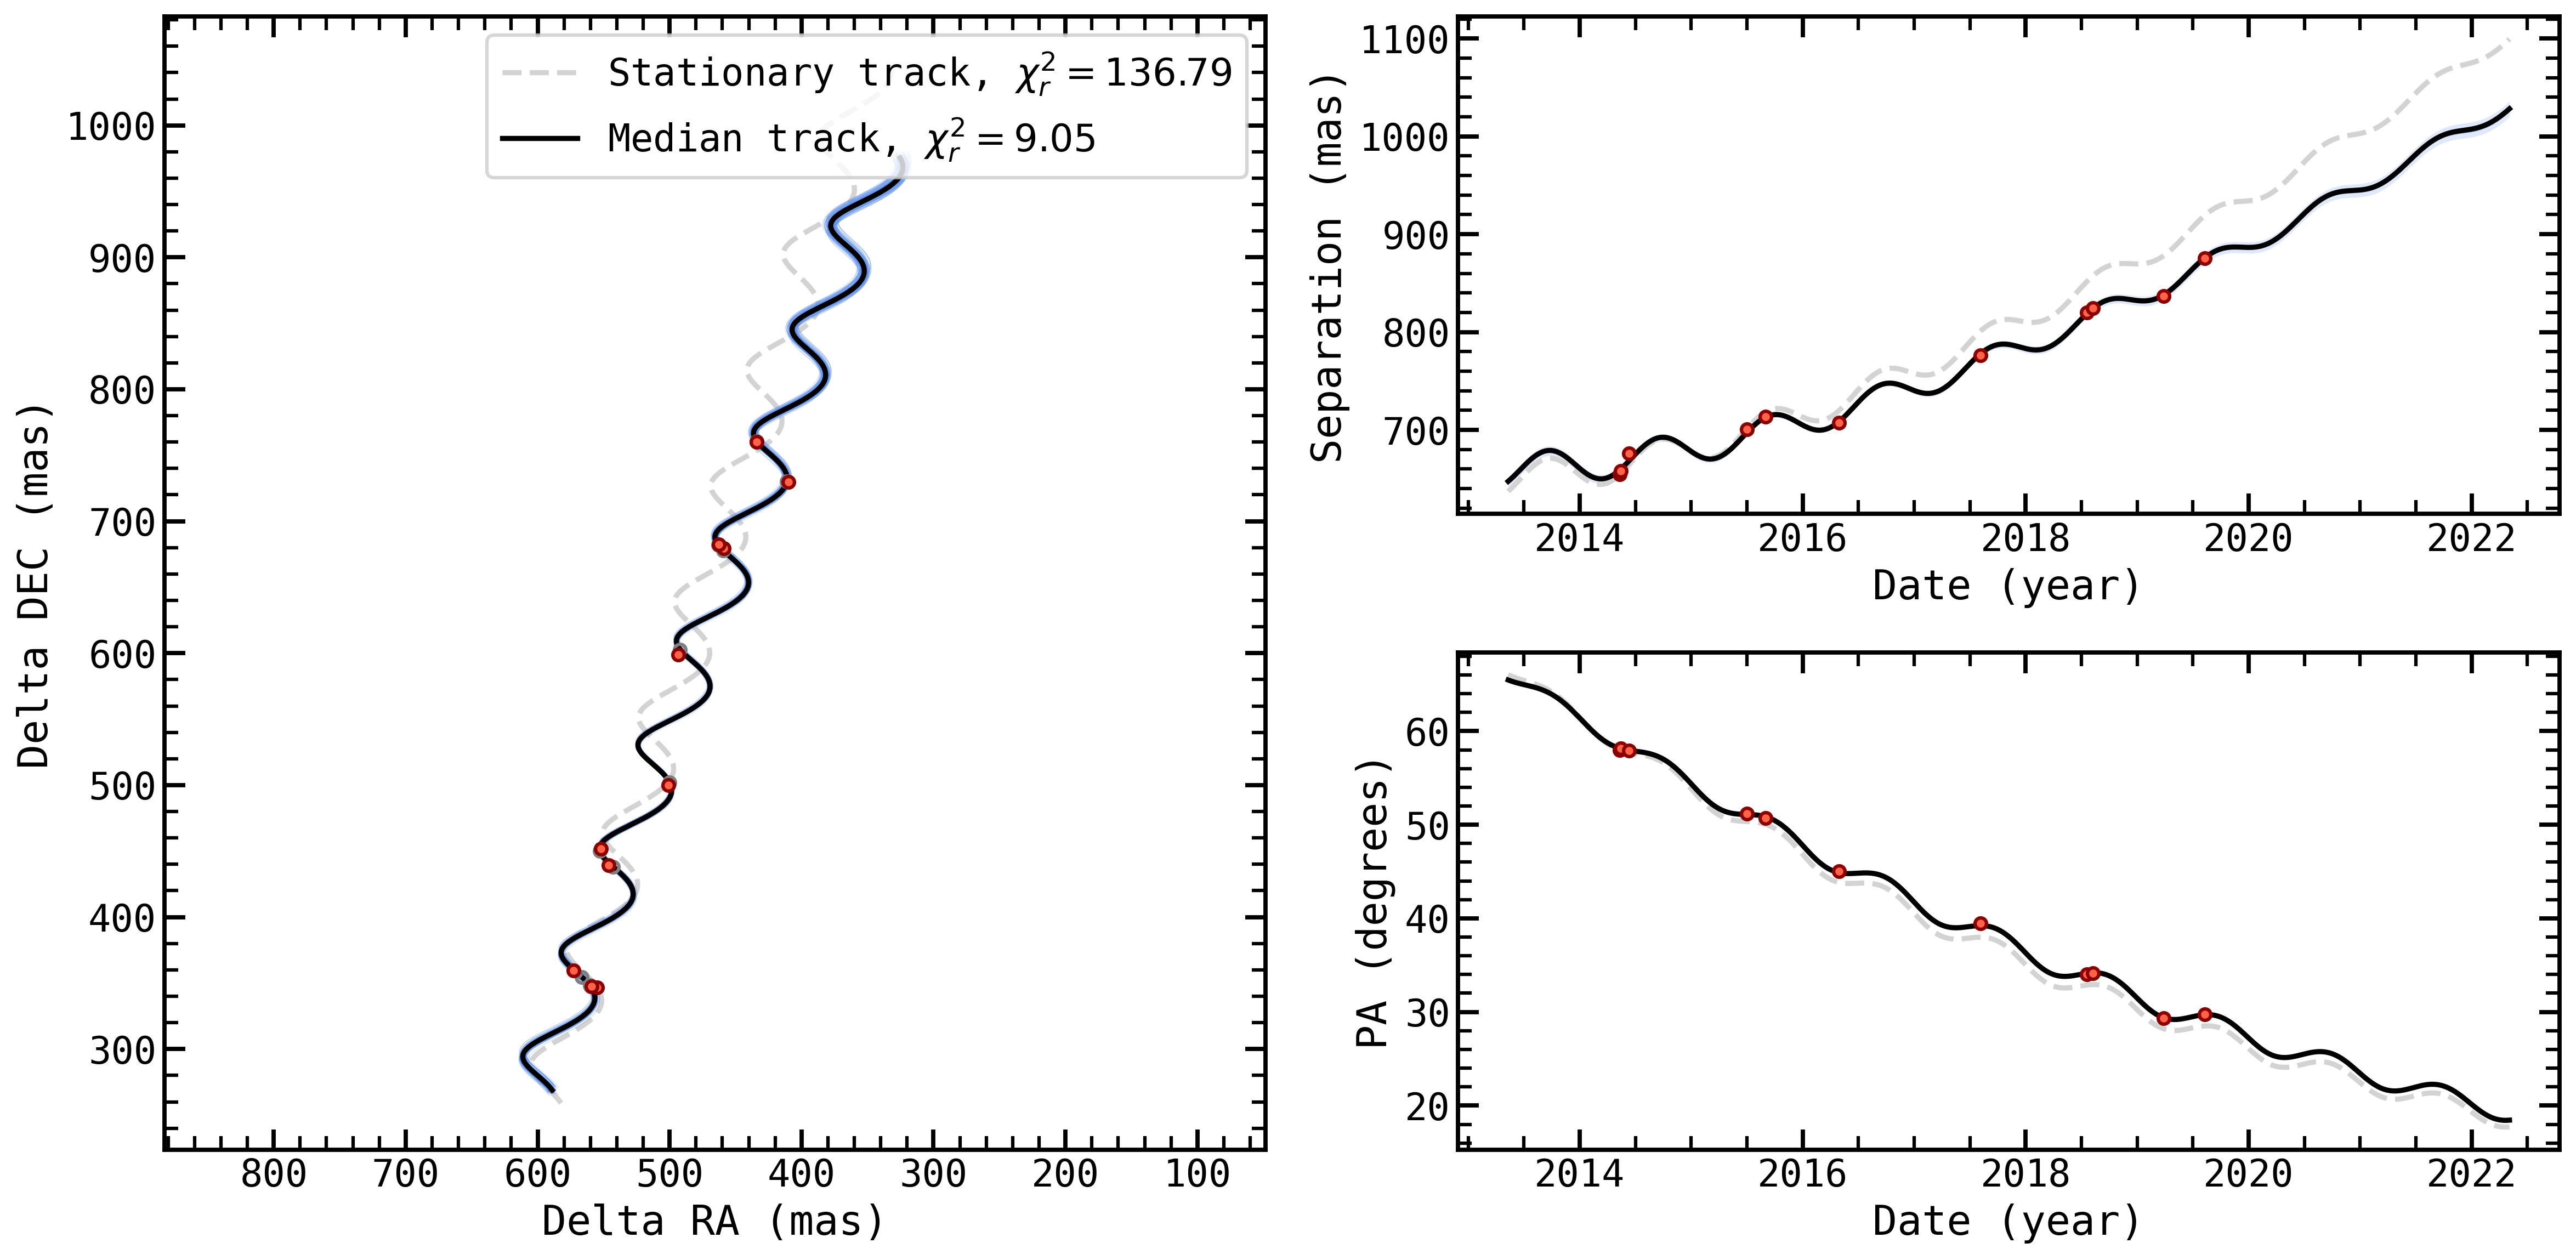

In [9]:
# plot up only the trackplot to show the results
plot_1 = trackplot(track,
                   ref_epoch = Time(track.ref_epoch, format='jd').jd,
                   days_backward=1.*365.,
                   days_forward=8.*365.,
                   step_size=10.,
                   plot_radec=False,
                   plot_stationary=True,
                   fileprefix='./',
                   filepost='.png'
                  )

## 2MASS J0602, Sanghi et al. (2024)

[Sanghi et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240814268S/abstract) found a companion candidate around the M-dwarf 2MASS J06022455-1634494 using an optimized reference differential imaging library; they concluded that the candidate was a likely background source.

In [10]:
!wget https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/0602cc1.csv

--2025-02-10 13:42:40--  https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/0602cc1.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/0602cc1.csv [following]
--2025-02-10 13:42:43--  https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/0602cc1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208 [text/plain]
Saving to: ‘0602cc1.csv’

0602cc1.csv         100%[===================>]     208  --.-KB/s    in 0s      

2025-02-10 13:42:49 (2.58 MB/s) - ‘0602cc1.csv’ saved [208/208]



In [11]:
track = System(target_name="2MASS J06022455-1634494",
               candidate_file="0602cc1.csv",
               nearby_window=0.5,
               fileprefix='./')

[BACKTRACKS INFO]: Examining object = 1 in input file.
[BACKTRACKS INFO]: Resolved the target star '2MASS J06022455-1634494' in Simbad!
[BACKTRACKS INFO]: Resolved target's Gaia ID from Simbad, Gaia DR3 2991362056431878912
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered Gaia DR3 data for 2MASS J06022455-1634494
   * Gaia source ID = 2991362056431878912
   * Reference epoch = 2016.0
   * RA = 90.6023 deg
   * Dec = -16.5807 deg
   * PM RA = -8.22 mas/yr
   * PM Dec = -67.49 mas/yr
   * Parallax = 24.87 mas
   * RV = -10.48 km/s
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered 3565 Gaia objects from the 0.5 sq. deg. nearby 2MASS J06022455-1634494
[BACKTRACKS INFO]: Finished nearby background gaia statistics
[BACKTRACKS INFO]: Queried distance prior parameters, L=1.60, alpha=0.38, beta=4.12
[BACKTRACKS INFO]: Estimating candidate position if stationary in RA,Dec @ 2016.0 from observation #0
[BACKTRACKS INFO]: Opened ephemeris file

[BACKTRACKS INFO]: Generating Stationary plot
[BACKTRACKS INFO]: Stationary plot saved to ./


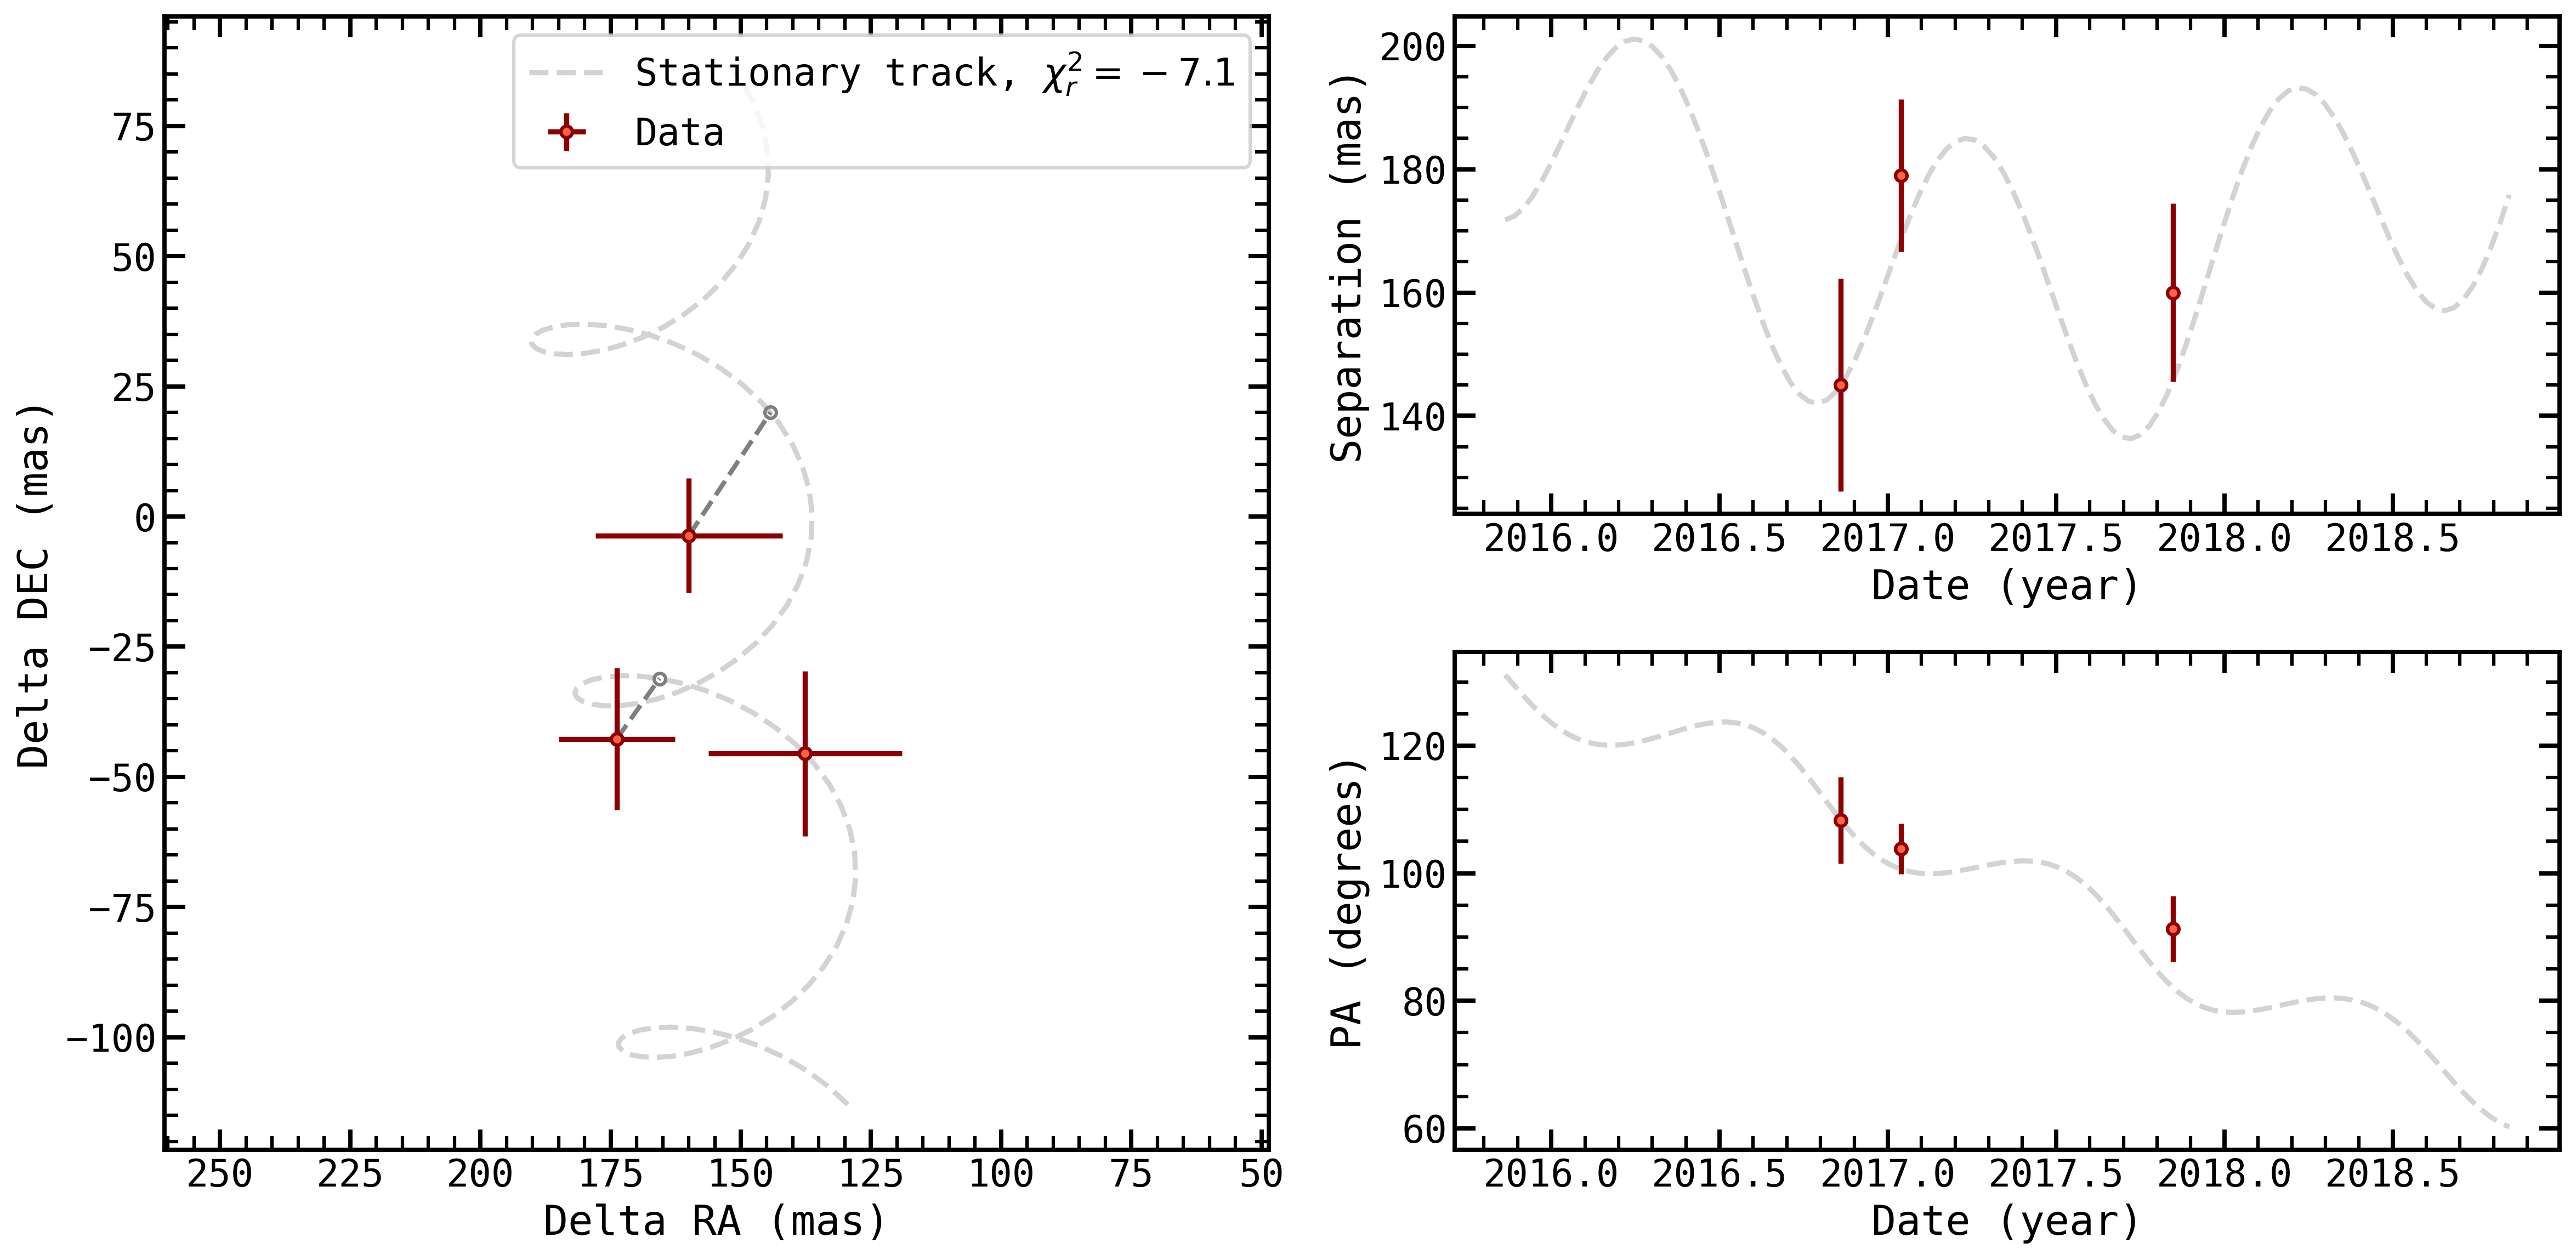

In [12]:
fig_stationary = track.generate_stationary_plot(days_backward=1*365.,
                                                days_forward=2*365,
                                                step_size=10.,
                                                filepost='.png')

# the degrees of freedom here are negative (more free parameters than observations), 
# so the reported chi2_r will be negative. oops!

It seems like the stationary background track fits the available data pretty well... but let's try to fit it just for kicks.

In [13]:
import multiprocessing as mp
results = track.fit(dlogz=1e-1, npool=mp.cpu_count(), 
                    dynamic=False, nlive=100,
                    mpi_pool=False, 
                    resume=False, 
                    sample_method='rslice')

# save our sampler results
track.save_results(fileprefix='./')

[BACKTRACKS INFO]: Beginning sampling


iter: 1821 | +100 | bound: 37 | nc: 1 | ncall: 119990 | eff(%):  1.602 | loglstar:   -inf < -21.835 <    inf | logz: -37.618 +/-  0.379 | dlogz:  0.001 >  0.100                                      

[BACKTRACKS INFO]: Saving results to ./2MASS_J06022455-1634494_cc1_dynestyrun_results.pkl


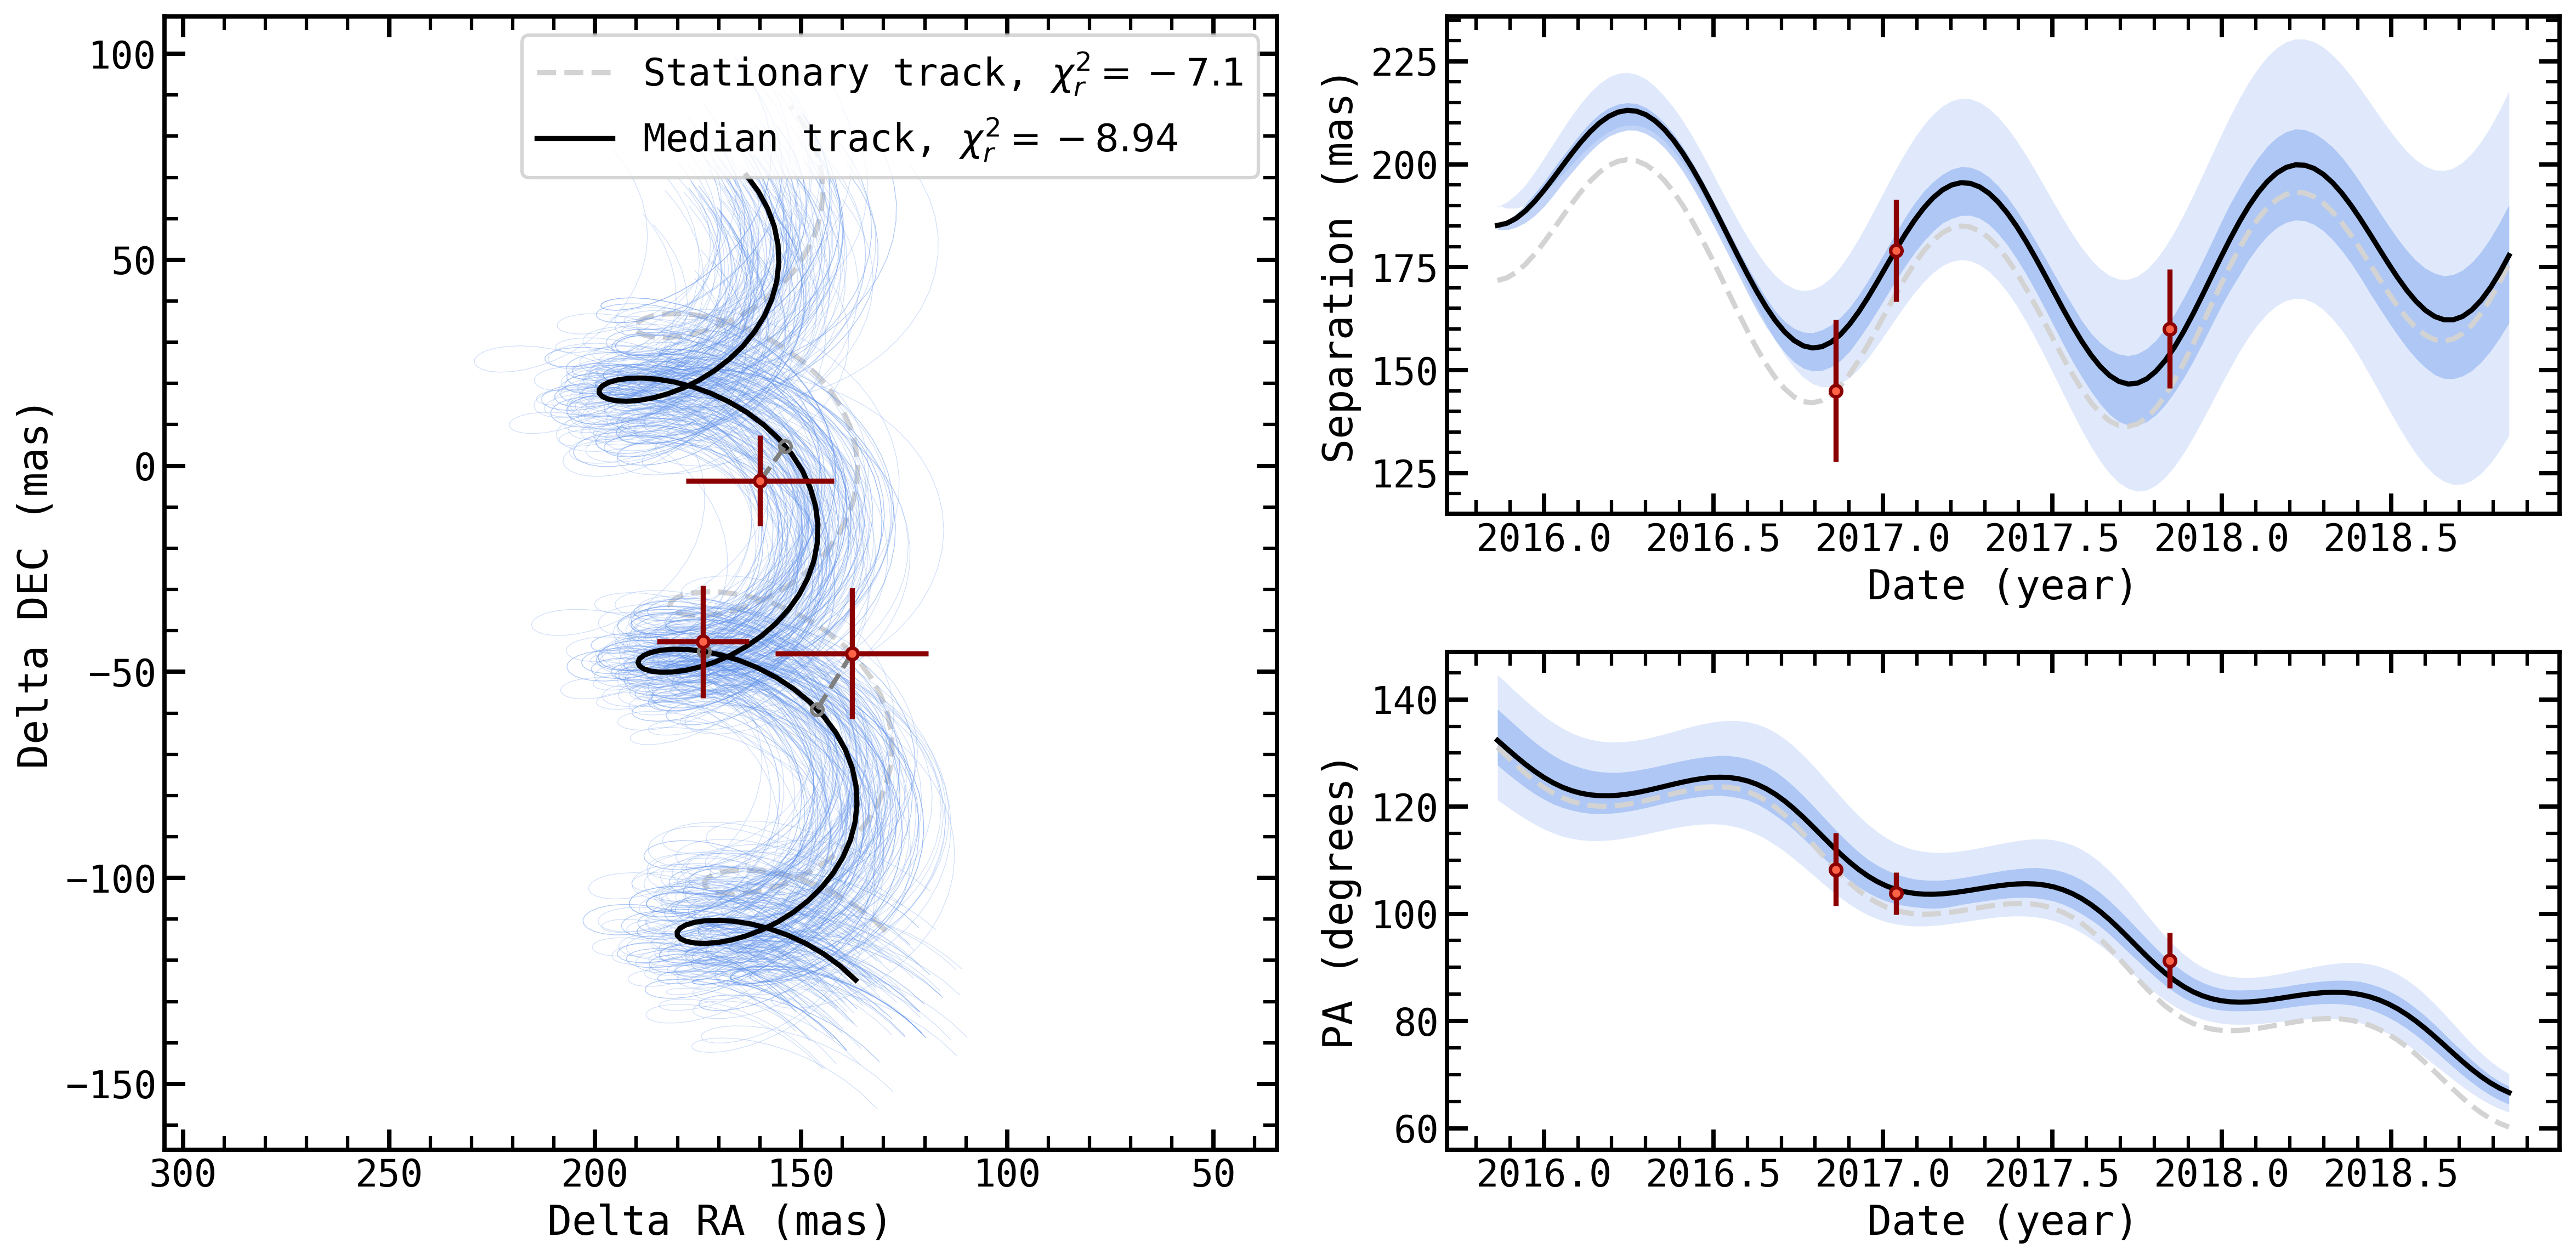

In [14]:
# plot up our results
plot_0 = trackplot(track,
                   ref_epoch = Time(track.ref_epoch, format='jd').jd,
                   days_backward=1.*365.,
                   days_forward=2.*365.,
                   step_size=10.,
                   plot_radec=False,
                   plot_stationary=True,
                   fileprefix='./',
                   filepost='.png'
                  )